# Inhibitor Diffusion and Germination - Multiple Spores

## Numerical experiments - Week 50/2024

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

From this point on, the code is structured in Python modules, which are imported into the notebooks.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda, float32
import matplotlib.gridspec as gridspec

from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

In [86]:
reload(st)
reload(df)
reload(conv)
reload(pt)

<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

In [87]:
N = 127
dx = 5
spore_density_exponents = np.arange(5, 10, 1)
spore_densities = 10**spore_density_exponents
spore_density = 1e5#1e9 # spores per mL

spore_coords_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords = st.populate_spore_grid_coords(N, dx, spore_density, True)
    spore_coords_all.append(spore_coords)

Conversion: 1.00000000000000E-7 micrometers^-3
Effective density: 1.2800000149582047e-05 spores/micrometer^3
Populating volume of 2048000 micrometers^3 with 26.214400306344032 spores, 5 spores per dimension
Spore spacing: 128.0 micrometers
Conversion: 0.00000100000000000000 micrometers^-3
Effective density: 0.00012799999967683107 spores/micrometer^3
Populating volume of 2048000 micrometers^3 with 262.14399933815 spores, 16 spores per dimension
Spore spacing: 40.0 micrometers
Conversion: 0.0000100000000000000 micrometers^-3
Effective density: 0.0012799999676644802 spores/micrometer^3
Populating volume of 2048000 micrometers^3 with 2621.4399337768555 spores, 51 spores per dimension
Spore spacing: 12.549019607843137 micrometers
Conversion: 0.000100000000000000 micrometers^-3
Effective density: 0.012799999676644802 spores/micrometer^3
Populating volume of 2048000 micrometers^3 with 26214.399337768555 spores, 161 spores per dimension
Spore spacing: 3.9751552795031055 micrometers
Conversion:

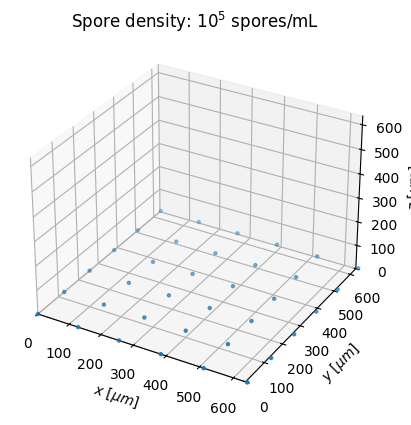

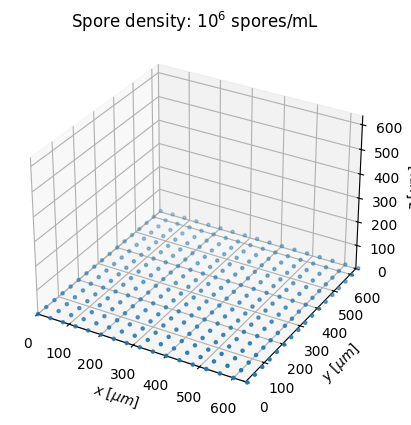

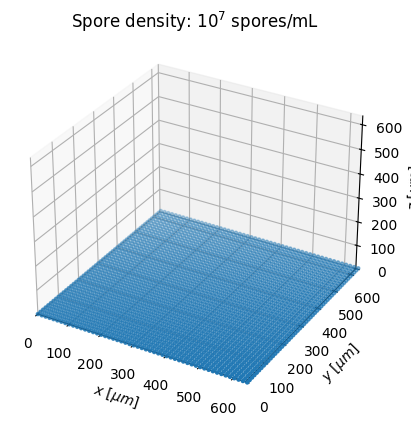

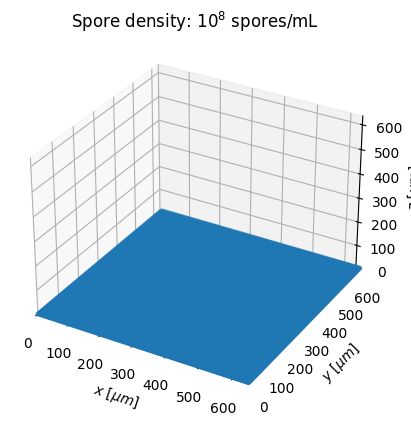

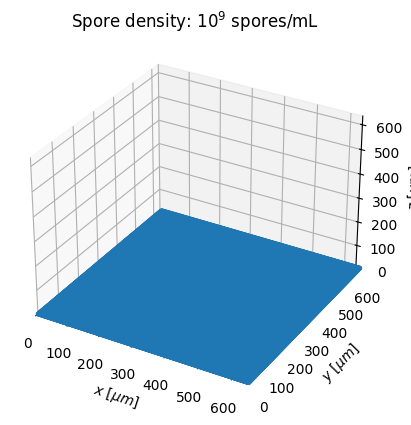

In [88]:
for i, spore_coords in enumerate(spore_coords_all):
    pt.plot_spore_positions(N, spore_coords[0].flatten(), spore_coords[1].flatten(), spore_coords[2].flatten(), dx, title=f'Spore density: $10^{spore_density_exponents[i]}$ spores/mL')